In [ ]:
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as seaborn
import math
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#preprocessing the data
df = pd.read_csv('../data/column_2C.dat',
                sep=' ',
                names=["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis", "class"])
df['target']=df['class'].apply(lambda x: 1 if x == 'AB' else 0)
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class,target
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1
...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0


## b(i) make the scatter graph

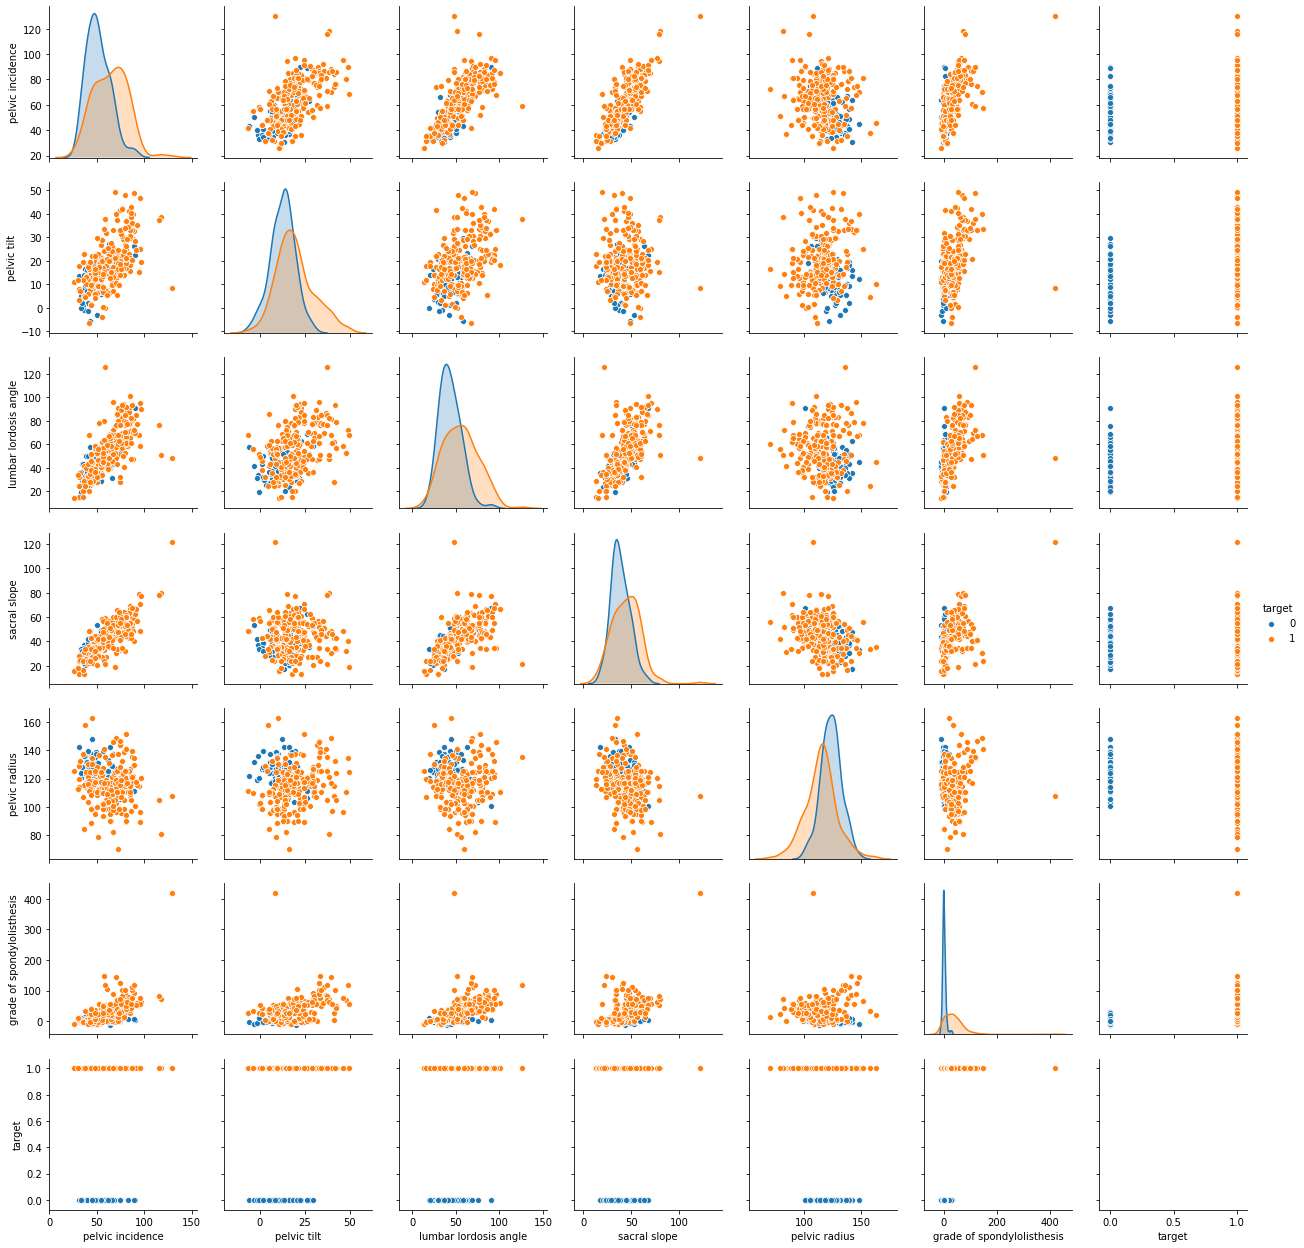

In [44]:
#pairplot with scatter
seaborn.pairplot(df, hue = 'target', kind = 'scatter')

## b(ii) make the boxplot

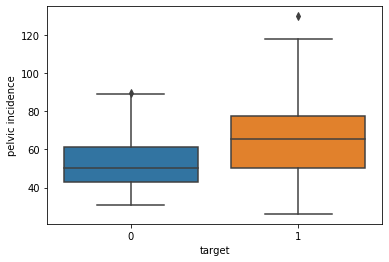

In [8]:
#pairplot with boxplot
seaborn.boxplot(x = 'target', y = 'pelvic incidence', data = df)

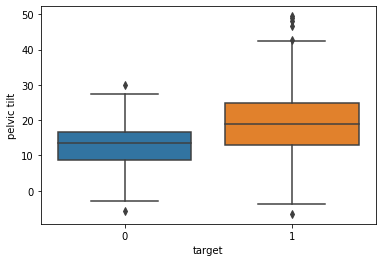

In [9]:
seaborn.boxplot(x = 'target', y = 'pelvic tilt', data = df)

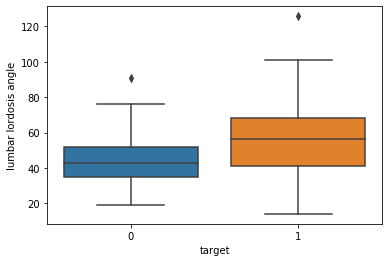

In [10]:
seaborn.boxplot(x = 'target', y = 'lumbar lordosis angle', data = df)

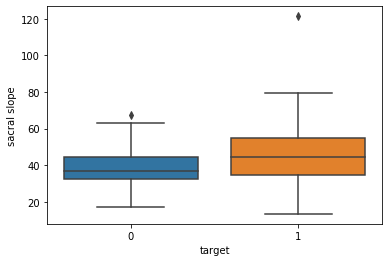

In [11]:
seaborn.boxplot(x = 'target', y = 'sacral slope', data = df)

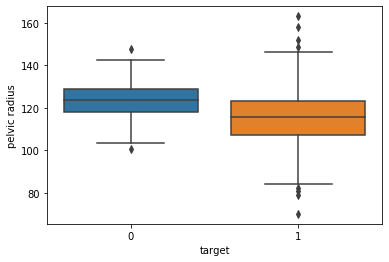

In [12]:
seaborn.boxplot(x = 'target', y = 'pelvic radius', data = df)

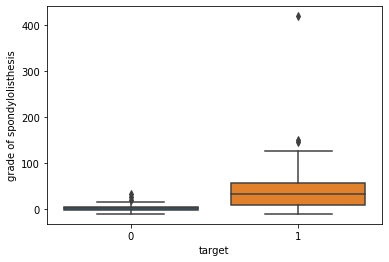

In [13]:
seaborn.boxplot(x = 'target', y = 'grade of spondylolisthesis', data = df)

## b(iii) Spliting the training the testing set

In [48]:
#spliting the training and testing data
train_1 = df[df['target'] == 1].head(140)
train_2 = df[df['target'] == 0].head(70)
frames_1 = [train_1, train_2]
training_data = pd.concat(frames_1)
test_1 = df[df['target'] == 1][140:210]
test_2 = df[df['target'] == 0][70:100]
frames_2 = [test_1, test_2]
testing_data = pd.concat(frames_2)

## c(i) use knn model

In [49]:
#apply the knn with Euclidean matrix
neigh = KNeighborsClassifier(n_neighbors=5)
X_train = training_data.iloc[:, 0:6]
y_train = training_data.iloc[:, 7]
neigh.fit(X_train, y_train)
X_test = testing_data.iloc[:, 0:6]
y_test = testing_data.iloc[:, 7]
test_predicting = neigh.predict(X_test)
testing_data['predicting_target'] = test_predicting
testing_data

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class,target,predicting_target
140,69.56,15.40,74.44,54.16,105.07,29.70,AB,1,1
141,89.50,48.90,72.00,40.60,134.63,118.35,AB,1,1
142,85.29,18.28,100.74,67.01,110.66,58.88,AB,1,1
143,60.63,20.60,64.54,40.03,117.23,104.86,AB,1,1
144,60.04,14.31,58.04,45.73,105.13,30.41,AB,1,1
...,...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0,1
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0,1
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0,0


## c(ii) choosing the best k-value

The minimum error for euclidean matrix is: 0.06000000000000005
With the k value of: 4
The minimum train error for euclidean matrix is: 0.0


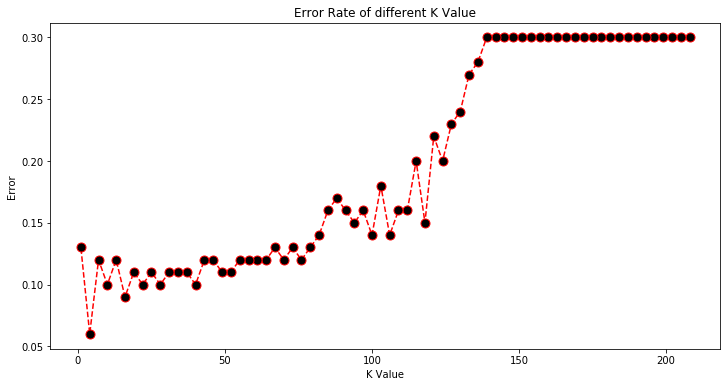

In [170]:
errorList = []
bestK = 0
minError = 1 
minTrainError = 1
# Calculating and ploting error for K values between 208 and 1
for i in range(208,-2,-3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = 1 - knn.score(X_test, y_test)
    train_error = 1 - knn.score(X_train, y_train)
    if (error < minError):
        minError = error
        bestK = i
    errorList.append(error)
    if(train_error < minTrainError):
        minTrainError = train_error
plt.figure(figsize=(12, 6))
plt.plot(range(208,-2,-3), errorList, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=9)
plt.title('Error Rate of different K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
print('The minimum error for euclidean matrix is:', minError)
print('With the k value of:', bestK)
print('The minimum train error for euclidean matrix is:', minTrainError)

In [127]:
#print out the confusion matrix
best_classifier = KNeighborsClassifier(n_neighbors=4)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  5]
 [ 1 69]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



## c(iii) plot the learning curve

Text(0, 0.5, 'Min Error for each N')

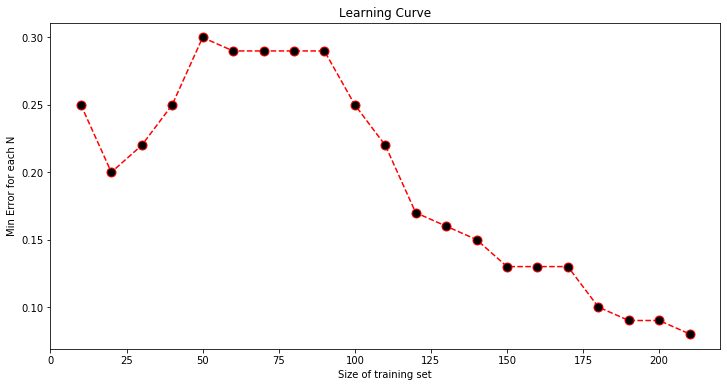

In [164]:
# print out the error wz the changing training set
bestKs = []
minErrors = []
for n in range(10, 220, 10):
    train_0 = df[df['target'] == 0].head(int(n / 3))
    train_1 = df[df['target'] == 1].head(n - int(n / 3))
    frames_train = [train_0, train_1]
    training_data = pd.concat(frames_train)
    X_changing_train = training_data.iloc[:, 0:6]
    y_changing_train = training_data.iloc[:, 7]
    
    minError = 1
    bestK = 0
    for k in range(1, n, 5):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_changing_train, y_changing_train)
        error = 1 - knn.score(X_test, y_test)
        if (error < minError):
            minError = error
            bestK = k
    bestKs.append(bestK)
    minErrors.append(minError)
plt.figure(figsize=(12, 6))
plt.plot(range(10, 220, 10), minErrors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=9)
plt.title('Learning Curve')
plt.xlabel('Size of training set')
plt.ylabel('Min Error for each N')

## d(i) apply the knn with Manhattan matrix and find the k*

The minimum error for Manhattan matrix is: 0.10999999999999999
With the k value of: 6
The minimum train error for Manhattan matrix is: 0.0


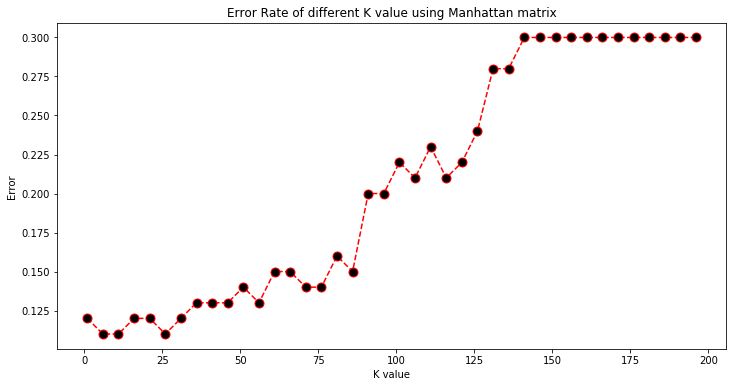

In [171]:
#apply the knn with Manhattan matrix and find the k*
errorList = []
bestK = 0
minError = 1
minTrainError = 1
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i, p = 1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = 1 - knn.score(X_test, y_test)
    train_error = 1 - knn.score(X_train, y_train)
    if (error < minError):
        minError = error
        bestK = i
    errorList.append(error)
    if (train_error < minTrainError):
        minTrainError = train_error
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201, 5), errorList, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=9)
plt.title('Error Rate of different K value using Manhattan matrix')
plt.xlabel('K value')
plt.ylabel('Error')
print('The minimum error for Manhattan matrix is:', minError)
print('With the k value of:', bestK)
print('The minimum train error for Manhattan matrix is:', minTrainError)

## d(ib) testing different p value

The minimum error for different p value is: 0.06000000000000005
With the log10p as: 0.6


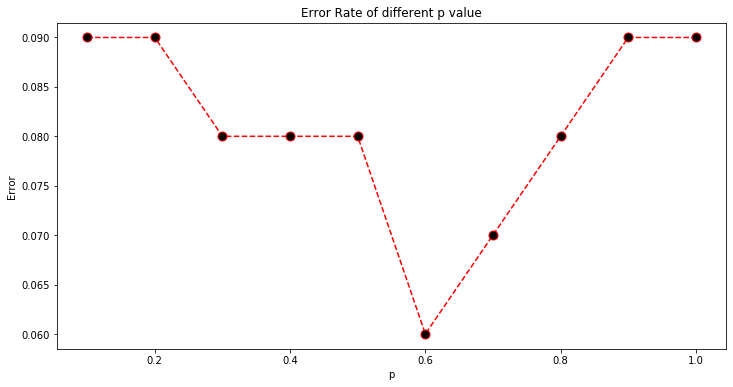

In [143]:
#testing different p value
errorList = []
bestX = 0
bestP = 0
minError = 1
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    p_Value = math.pow(10, i)
    knn = KNeighborsClassifier(n_neighbors = 6, p = p_Value) # have problem on the k value
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = 1 - knn.score(X_test, y_test)
    if (error < minError):
        minError = error
        bestP = p_Value
        bestX = i
    errorList.append(error)
plt.figure(figsize=(12, 6))
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], errorList, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=9)
plt.title('Error Rate of different p value')
plt.xlabel('p')
plt.ylabel('Error')
print('The minimum error for different p value is:', minError)
print('With the log10p as:', bestX)

## d(iC) Chebyshev Distance

In [172]:
#Chebyshev Distance
errorListChebyshevDistance = []
bestK = 0
minError = 1
minTrainError = 1
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors = i, p = float('inf'))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = 1 - knn.score(X_test, y_test)
    train_error = 1 - knn.score(X_train, y_train)
    if (error < minError):
        minError = error
        bestK = i
    errorListChebyshevDistance.append(error)
    if (train_error < minTrainError):
        minTrainError = train_error
print('The minimum error for Chebyshev matrix is:', minError)
print('With the k value of:', bestK)
print('The minimum train error for Chebyshev matrix is:', minTrainError)

The minimum error for Chebyshev matrix is: 0.07999999999999996
With the k value of: 16
The minimum train error for Chebyshev matrix is: 0.0


## d(ii) Mahalanobis Distance

In [173]:
#Mahalanobis Distance
errorListMahalanobisDistance = []
bestK = 0
minError = 1
minTrainError = 1
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors = i, metric_params={'VI':np.cov(X_train,rowvar=False)}, metric = 'mahalanobis')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = 1 - knn.score(X_test, y_test)
    train_error = 1 - knn.score(X_train, y_train)
    if (error < minError):
        minError = error
        bestK = i
    errorListMahalanobisDistance.append(error)
    if (train_error < minTrainError):
        minTrainError = train_error
print('The minimum error for Mahalanobis matrix is:', minError)
print('With the k value of:', bestK)
print('The minimum train error for Mahalanobis matrix is:', minTrainError)

The minimum error for Mahalanobis matrix is: 0.07999999999999996
With the k value of: 6
The minimum train error for Mahalanobis matrix is: 0.0


In [169]:
#Summarize the best K for different distance matrix in one table
table = [['distance matrix', 'Best K-value', 'Best test error'], ['Manhattan', 6, 0.10999999999999999], ['Chebyshev', 16, 0.07999999999999996], ['Mahalanobis', 6, 0.07999999999999996], ['log10p', 6， ]]
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+-------------------+----------------+-------------------+
| distance matrix   |   Best K-value |   Best test error |
+===================+================+===================+
| Manhattan         |              6 |              0.11 |
+-------------------+----------------+-------------------+
| Chebyshev         |             16 |              0.08 |
+-------------------+----------------+-------------------+
| Mahalanobis       |              6 |              0.08 |
+-------------------+----------------+-------------------+


## e weighted decision Euclidean

In [175]:
#weighted decision Euclidean
errorList = []
bestK = 0
minError = 1
minTrainError = 1
for i in range(1, 201, 5):
    knn_weighted_euclidean = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'euclidean', p = 2, n_jobs = -1)
    knn_weighted_euclidean.fit(X_train, y_train)
    pred_i = knn_weighted_euclidean.predict(X_test)
    error = 1 - knn_weighted_euclidean.score(X_test, y_test)
    train_error = 1 - knn_weighted_euclidean.score(X_train, y_train)
    if (error < minError):
        minError = error
        bestK = i
    errorList.append(error)
    if (train_error < minTrainError):
        minTrainError = train_error
print('The minimum error for weighted euclidean matrix is:', minError)
print('With the k value of:', bestK)
print('The minimum train error for weighted euclidean matrix is:', minTrainError)

The minimum error for weighted euclidean matrix is: 0.09999999999999998
With the k value of: 6
The minimum train error for weighted euclidean matrix is: 0.0


## e weighted decision Manhattan

In [176]:
#weighted decision Manhattan
errorListM = []
bestKM = 0
minErrorM = 1
minTrainError = 1
for i in range(1, 201, 5):
    knn_weighted_euclidean = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'manhattan', p = 1, n_jobs = -1)
    knn_weighted_euclidean.fit(X_train, y_train)
    pred_i = knn_weighted_euclidean.predict(X_test)
    error = 1 - knn_weighted_euclidean.score(X_test, y_test)
    train_error = 1 - knn_weighted_euclidean.score(X_train, y_train)
    if (error < minErrorM):
        minErrorM = error
        bestKM = i
    errorListM.append(error)
    if (train_error < minTrainError):
        minTrainError = train_error
print('The minimum error for weighted manhattan matrix is:', minErrorM)
print('With the k value of:', bestKM)
print('The minimum train error for weighted manhattan matrix is:', minTrainError)

The minimum error for weighted manhattan matrix is: 0.09999999999999998
With the k value of: 26
The minimum train error for weighted manhattan matrix is: 0.0


## e weighted decision Chebyshev

In [177]:
#weighted decision Chebyshev
errorListM = []
bestKM = 0
minErrorM = 1
minTrainError = 1
for i in range(1, 201, 5):
    knn_weighted_euclidean = KNeighborsClassifier(n_neighbors = i, weights = 'distance', p = float('inf'))
    knn_weighted_euclidean.fit(X_train, y_train)
    pred_i = knn_weighted_euclidean.predict(X_test)
    error = 1 - knn_weighted_euclidean.score(X_test, y_test)
    train_error = 1 - knn_weighted_euclidean.score(X_train, y_train)
    if (error < minErrorM):
        minErrorM = error
        bestKM = i
    errorListM.append(error)
    if (train_error < minTrainError):
        minTrainError = train_error
print('The minimum error for weighted Chebyshev matrix is:', minErrorM)
print('With the k value of:', bestKM)
print('The minimum train error for weighted Chebyshev matrix is:', minTrainError)

The minimum error for weighted Chebyshev matrix is: 0.10999999999999999
With the k value of: 16
The minimum train error for weighted Chebyshev matrix is: 0.0


## f. The minimus training error I got in this homework is 0